In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys, os
sys.path.append(os.environ['raco'])
sys.path.append(os.environ['rapp'])
sys.path.append(os.environ['rapl'])
from common import *
from plotcommon import *
from cla_util import *
from rayleigh_diagnostics import GridInfo

In [2]:
dirname = '/nobackup/lmatilsk/backitup/case_M-Prm4.0/00_test_equations/'

In [3]:
print(os.listdir(dirname + 'data/'))
the_file = get_widest_range_file (dirname + 'data/', 'Point_Probes_trace')
print ('the_file = ', the_file)

['Point_Probes_trace-24900001_24900100.pkl']
the_file =  /nobackup/lmatilsk/backitup/case_M-Prm4.0/00_test_equations/data/Point_Probes_trace-24900001_24900100.pkl


In [4]:
# get point probes data
di = get_dict(the_file)
vals = di['vals']
times = di['times']
iters = di['iters']
lut = di['lut']
rvals = di['rvals']
thetavals = di['thetavals']
phivals = di['phivals']

# get grid info
di_grid = get_grid_info(dirname)
rr = di_grid['rr']
tt = di_grid['tt']
phi = di_grid['phi']
tt_lat = di_grid['tt_lat']
lons = di_grid['lons']

irvals = inds_from_vals(rr, rvals)
ithetavals = inds_from_vals(tt, thetavals)
iphivals = inds_from_vals(phi, phivals)

print ('irvals = ', irvals)
print ('ithetavals = ', ithetavals)
print ('iphivals = ', iphivals)

print ('rvals/rsun = ', rr[irvals]/rsun)
print ('tt_lat = ', tt_lat[ithetavals])
print ('lons = ', lons[iphivals])

print ('shape(vals) = ', np.shape(vals))
print ('nphi, ntheta, nr = ', di_grid['nphi'], di_grid['nt'], di_grid['nr'])

irvals =  [  9  14  21  26  31  37  42  49  54  63  84  98 136 146 154 160 167 175
 181]
ithetavals =  [ 19  48  96 144 191 239 287 335 364]
iphivals =  [  0  96 192 288 384 479 575 671]
rvals/rsun =  [0.93453501 0.91902629 0.88888912 0.86309906 0.83548624 0.80227695
 0.77648689 0.74634972 0.730841   0.71870059 0.70707956 0.6906394
 0.66109085 0.63447754 0.6034544  0.57752866 0.5476774  0.51833426
 0.50226305]
tt_lat =  [-80.75392872 -67.17803833 -44.70736427 -22.2366512   -0.23407002
  22.2366512   44.70736427  67.17803833  80.75392872]
lons =  [  0.       45.       90.      135.      180.      224.53125 269.53125
 314.53125]
shape(vals) =  (100, 8, 9, 19, 79)
nphi, ntheta, nr =  768 384 192


In [5]:
prot = compute_Prot(dirname)
t = times/prot

In [6]:
np.diff(times)

array([228.72198868, 228.72198868, 228.72198868, 228.72198868,
       228.72198868, 228.72198868, 228.72198868, 228.72198868,
       228.72198868, 228.72198868, 228.72198868, 228.72198868,
       228.72198868, 228.72198868, 228.72198868, 228.72198868,
       228.72198868, 228.72198868, 228.72198868, 228.72198868,
       228.72198868, 228.72198868, 228.72198868, 228.72198868,
       228.72198868, 228.72198868, 228.72198868, 228.72198868,
       228.72198868, 228.72198868, 228.72198868, 228.72198868,
       228.72198868, 228.72198868, 228.72198868, 228.72198868,
       228.72198868, 228.72198868, 228.72198868, 228.72198868,
       228.72198868, 228.72198868, 228.72198868, 228.72198868,
       228.72198868, 228.72198868, 228.72198868, 228.72198868,
       228.72198868, 228.72198868, 228.72198868, 228.72198868,
       228.72198868, 228.72198868, 228.72198868, 228.72198868,
       228.72198868, 228.72198868, 228.72198868, 228.72198868,
       228.72198868, 228.72198868, 228.72198868, 228.72

In [7]:
# thermo state
eq = get_eq(dirname)

In [8]:
iir0, iit0, iiphi0 = 4,6,3

ir0, it0, iphi0 = irvals[iir0], ithetavals[iit0], iphivals[iiphi0]

print ("r/rsun = ", rvals[iir0]/rsun)
print ("lat = ", tt_lat[it0])
print ("lon = ", lons[iphi0])

rhovr = vals[:, iiphi0, iit0, iir0, lut[201]]

adv_r = -vals[:, iiphi0, iit0, iir0, lut[1201]]
buoy = vals[:, iiphi0, iit0, iir0, lut[1216]]
cor_r = vals[:, iiphi0, iit0, iir0, lut[1219]]

visc_r = vals[:, iiphi0, iit0, iir0, lut[1228]]
gradp_r = vals[:, iiphi0, iit0, iir0, lut[1237]]

#jxb_r = vals[:, iiphi0, iit0, iir0, lut[1248]]

r/rsun =  0.8354862388767398
lat =  44.70736427236024
lon =  135.0


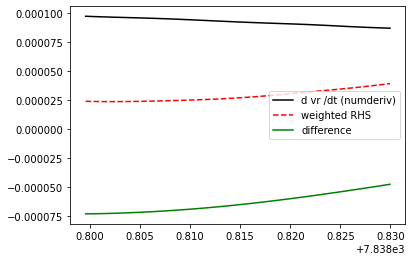

In [9]:
# compare two forces

# discrete time derivative (LHS)
drhovr = rhovr[2:] - rhovr[1:-1]
dt = times[2:] - times[1:-1]
dt_old = times[1:-1] - times[:-2]
drhovrdt = drhovr/dt

# RHS (some of source/sink terms)
f_exp = cor_r + adv_r# + jxb_r
f_imp = gradp_r + buoy + visc_r
rhs_momr = f_weighted = 0.5*(f_imp[2:] + f_imp[1:-1]) + f_exp[1:-1] + 0.5*(dt/dt_old)*(f_exp[1:-1] - f_exp[:-2])

plt.plot(t[2:], drhovrdt, 'k', label='d vr /dt (numderiv)')
plt.plot(t[2:], f_weighted, 'r--', label='weighted RHS')
plt.plot(t[2:], f_weighted - drhovrdt, 'g', label='difference')

#plt.plot(t, f_r/rho[ir0], label='weighted RHS')

plt.legend()

In [10]:
# well that looks pretty good!

In [11]:
#Let's look at rho_v_theta
rhovt = vals[:, iiphi0, iit0, iir0, lut[202]]

adv_t = -vals[:, iiphi0, iit0, iir0, lut[1202]]
cor_t = vals[:, iiphi0, iit0, iir0, lut[1220]]

visc_t = vals[:, iiphi0, iit0, iir0, lut[1229]]
gradp_t = vals[:, iiphi0, iit0, iir0, lut[1238]]

#jxb_t = vals[:, iiphi0, iit0, iir0, lut[1249]]

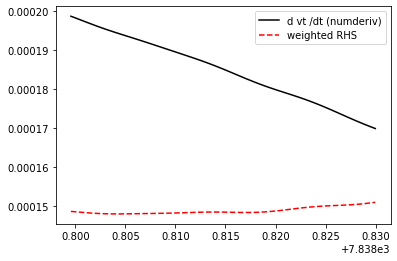

In [12]:
drhovt = rhovt[2:] - rhovt[1:-1]
drhovtdt = drhovt/dt

f_exp = cor_t + adv_t# + jxb_t
f_imp = gradp_t + visc_t

rhs_momt = f_weighted = 0.5*(f_imp[2:] + f_imp[1:-1]) + f_exp[1:-1] + 0.5*(dt/dt_old)*(f_exp[1:-1] - f_exp[:-2])

plt.plot(t[2:], drhovtdt, 'k', label='d vt /dt (numderiv)')
plt.plot(t[2:], f_weighted, 'r--', label='weighted RHS')
#plt.plot(t, f_r/rho[ir0], label='weighted RHS')

plt.legend()

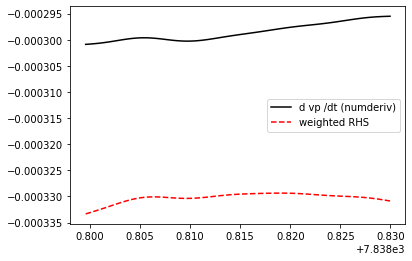

In [13]:
# and then phi
rhovp = vals[:, iiphi0, iit0, iir0, lut[203]]
drhovp = rhovp[2:] - rhovp[1:-1]
drhovpdt = drhovp/dt

adv_p = -vals[:, iiphi0, iit0, iir0, lut[1203]]
cor_p = vals[:, iiphi0, iit0, iir0, lut[1221]]

visc_p = vals[:, iiphi0, iit0, iir0, lut[1230]]
gradp_p = vals[:, iiphi0, iit0, iir0, lut[1239]]

#jxb_p = vals[:, iiphi0, iit0, iir0, lut[1250]]

f_exp = cor_p + adv_p# + jxb_p
f_imp = gradp_p + visc_p
rhs_momp = f_weighted = 0.5*(f_imp[2:] + f_imp[1:-1]) + f_exp[1:-1] + 0.5*(dt/dt_old)*(f_exp[1:-1] - f_exp[:-2])

plt.plot(t[2:], drhovpdt, 'k', label='d vp /dt (numderiv)')
plt.plot(t[2:], f_weighted, 'r--', label='weighted RHS')
#plt.plot(t, f_r/rho[ir0], label='weighted RHS')

plt.legend()

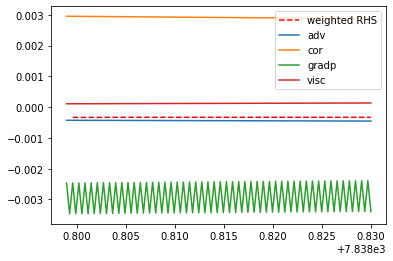

In [14]:
# break up phi momentum into more pieces
plt.plot(t[2:], f_weighted, 'r--', label='weighted RHS')
plt.plot(t, adv_p, label='adv')
plt.plot(t, cor_p, label='cor')
plt.plot(t, gradp_p, label='gradp')
plt.plot(t, visc_p, label='visc')

         
#plt.plot(t, f_r/rho[ir0], label='weighted RHS')

plt.legend()

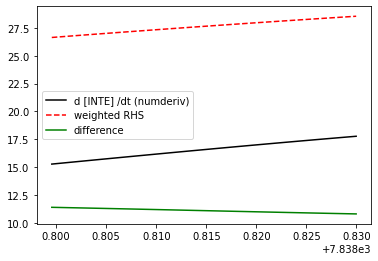

In [15]:
# for good measure, see what heat equation does
inte = vals[:, iiphi0, iit0, iir0, lut[701]]
dinte = inte[2:] - inte[1:-1]
dintedt = dinte/dt

adv_heat = -vals[:, iiphi0, iit0, iir0, lut[1401]]
ref_adv_heat = -rhovr*(eq.T*eq.dsdr)[ir0]
cond_heating = vals[:, iiphi0, iit0, iir0, lut[1421]]
int_heating = vals[:, iiphi0, iit0, iir0, lut[1434]]
visc_heating = vals[:, iiphi0, iit0, iir0, lut[1435]]

f_exp = adv_heat + visc_heating# + joule_heating
f_imp = ref_adv_heat + cond_heating + int_heating
f_weighted = 0.5*(f_imp[2:] + f_imp[1:-1]) + f_exp[1:-1] + 0.5*(dt/dt_old)*(f_exp[1:-1] - f_exp[:-2])

plt.plot(t[2:], dintedt, 'k', label='d [INTE] /dt (numderiv)')
plt.plot(t[2:], f_weighted, 'r--', label='weighted RHS')
#plt.plot(t, f_r/rho[ir0], label='weighted RHS')
plt.plot(t[2:], f_weighted - dintedt, 'g', label='difference')

plt.legend()

In [16]:
# yeah this guy isn't so hot

In [17]:
# check numerical errors in the momentum equation
print ("err mom r = ", rms(rhs_momr - drhovrdt)/rms(drhovrdt))
print ("err mom t = ", rms(rhs_momt - drhovtdt)/rms(drhovtdt))
print ("err mom p = ", rms(rhs_momp - drhovpdt)/rms(drhovpdt))

err mom r =  0.6963391797616958
err mom t =  0.20018525528417466
err mom p =  0.10628897175467507
